In [59]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person =60, resize = 0.1)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 12, 9)


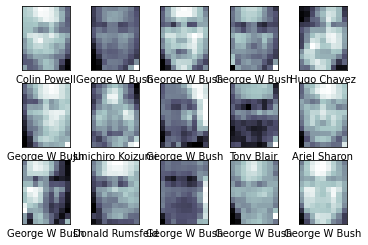

In [60]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks =[], yticks=[], xlabel = faces.target_names[faces.target[i]])

In [64]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 100, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca,svc)

In [65]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [66]:
from sklearn.model_selection import learning_curve, GridSearchCV

param_grid = {'svc__C': [1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(xtrain, ytrain)
print(grid.best_params_)

Wall time: 13.2 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [67]:
model = grid.best_estimator_
yfit = model.predict(xtest)

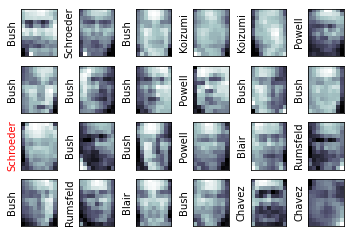

In [70]:
fix, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(12,9), cmap  = 'bone')
    axi.set(xticks = [], yticks =[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                    color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14);

In [71]:
from sklearn.metrics import classification_report

print(classification_report(ytest,yfit, 
                           target_names = faces.target_names))



                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.67      0.74        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.85      0.74      0.79        31
    George W Bush       0.86      0.94      0.90       126
Gerhard Schroeder       0.83      0.83      0.83        23
      Hugo Chavez       1.00      0.70      0.82        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.89      0.79      0.84        42

         accuracy                           0.85       337
        macro avg       0.88      0.81      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(91.68, 0.5, 'predicted label')

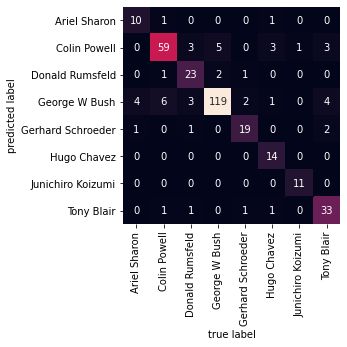

In [72]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)

sns.heatmap(mat.T, square = True, annot=True, fmt = 'd', cbar = False,
           xticklabels= faces.target_names,
           yticklabels= faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')